by Nicholas Stepanov

In [3]:
import pandas
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## banknote-authentication dataset
### Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)  Source: [UCI]
### (https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - 2012  Please cite: [UCI]
### (https://archive.ics.uci.edu/ml/citation_policy.html)  
Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.
### Attribute Information   
#### V1. variance of Wavelet Transformed image (continuous)  
#### V2. skewness of Wavelet Transformed image (continuous) 
#### V3. curtosis of Wavelet Transformed image (continuous) 
#### V4. entropy of image (continuous)   
#### Class (target). Presumably 1 for genuine and 2 for forged

In [4]:
data = pandas.read_csv("data/banknote-data.csv")
full_features = data[list(["V1","V2","V3", "V4"])]
features_1 = data[list(["V2","V3", "V4"])]
features_2 = data[list(["V1","V3", "V4"])]
features_3 = data[list(["V1","V2", "V4"])]
features_4 = data[list(["V1","V2","V3"])]
labels = data["Class"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(full_features, labels, random_state=0)
full_forest = RandomForestClassifier(n_estimators=20, max_features=4 )
full_forest.fit(X_train, y_train)
print ("Test accuracy (full):" , full_forest.score(X_test,y_test))
X_train, X_test, y_train, y_test = train_test_split(features_1, labels, random_state=0)
forest_1 = RandomForestClassifier(n_estimators=20, max_features=3 )
forest_1.fit(X_train, y_train)
print ("Test accuracy (no V1):" , forest_1.score(X_test,y_test))
X_train, X_test, y_train, y_test = train_test_split(features_2, labels, random_state=0)
forest_2 = RandomForestClassifier(n_estimators=20, max_features=3 )
forest_2.fit(X_train, y_train)
print ("Test accuracy (no V2):" , forest_2.score(X_test,y_test))
X_train, X_test, y_train, y_test = train_test_split(features_3, labels, random_state=0)
forest_3 = RandomForestClassifier(n_estimators=20, max_features=3 )
forest_3.fit(X_train, y_train)
print ("Test accuracy (no V3):" , forest_3.score(X_test,y_test))
X_train, X_test, y_train, y_test = train_test_split(features_4, labels, random_state=0)
forest_4 = RandomForestClassifier(n_estimators=20, max_features=3 )
forest_4.fit(X_train, y_train)
print ("Test accuracy (no V4):" , forest_4.score(X_test,y_test))

Test accuracy (full): 0.9912536443148688
Test accuracy (no V1): 0.9533527696793003
Test accuracy (no V2): 0.967930029154519
Test accuracy (no V3): 0.9737609329446064
Test accuracy (no V4): 0.9854227405247813


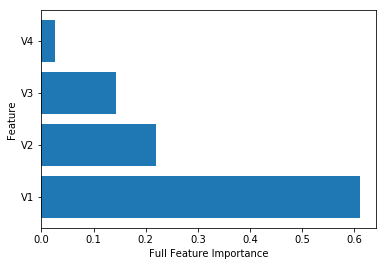

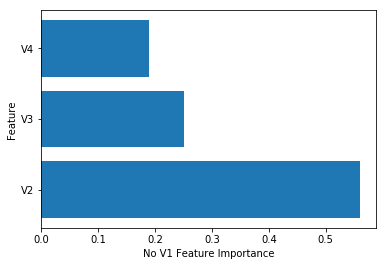

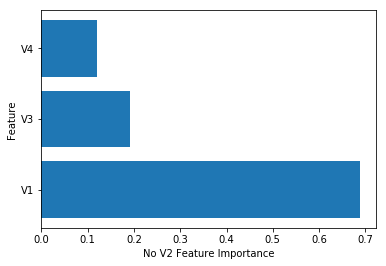

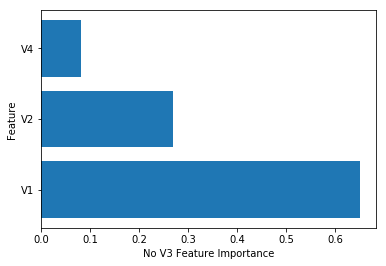

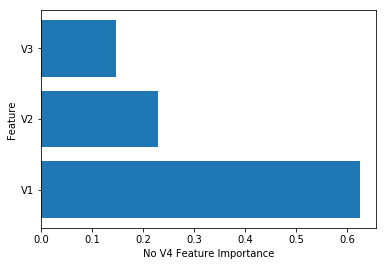

In [6]:
import matplotlib.pyplot as plt
n_features = 4
plt.barh(range(n_features), full_forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ["V1", "V2", "V3","V4"])
plt.xlabel('Full Feature Importance')
plt.ylabel('Feature')
plt.show()
n_features = 3
plt.barh(range(n_features), forest_1.feature_importances_, align='center')
plt.yticks(np.arange(n_features), [ "V2", "V3","V4"])
plt.xlabel('No V1 Feature Importance')
plt.ylabel('Feature')
plt.show()
plt.barh(range(n_features), forest_2.feature_importances_, align='center')
plt.yticks(np.arange(n_features), [ "V1", "V3","V4"])
plt.xlabel('No V2 Feature Importance')
plt.ylabel('Feature')
plt.show()
plt.barh(range(n_features), forest_3.feature_importances_, align='center')
plt.yticks(np.arange(n_features), [ "V1", "V2","V4"])
plt.xlabel('No V3 Feature Importance')
plt.ylabel('Feature')
plt.show()
plt.barh(range(n_features), forest_4.feature_importances_, align='center')
plt.yticks(np.arange(n_features), [ "V1", "V2","V3"])
plt.xlabel('No V4 Feature Importance')
plt.ylabel('Feature')
plt.show()